# Create Beautiful Architecture Diagrams with Python


In [1]:
!pip install diagrams

     |████████████████████████████████| 23.8 MB 1.2 MB/s 
     |████████████████████████████████| 46 kB 1.7 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


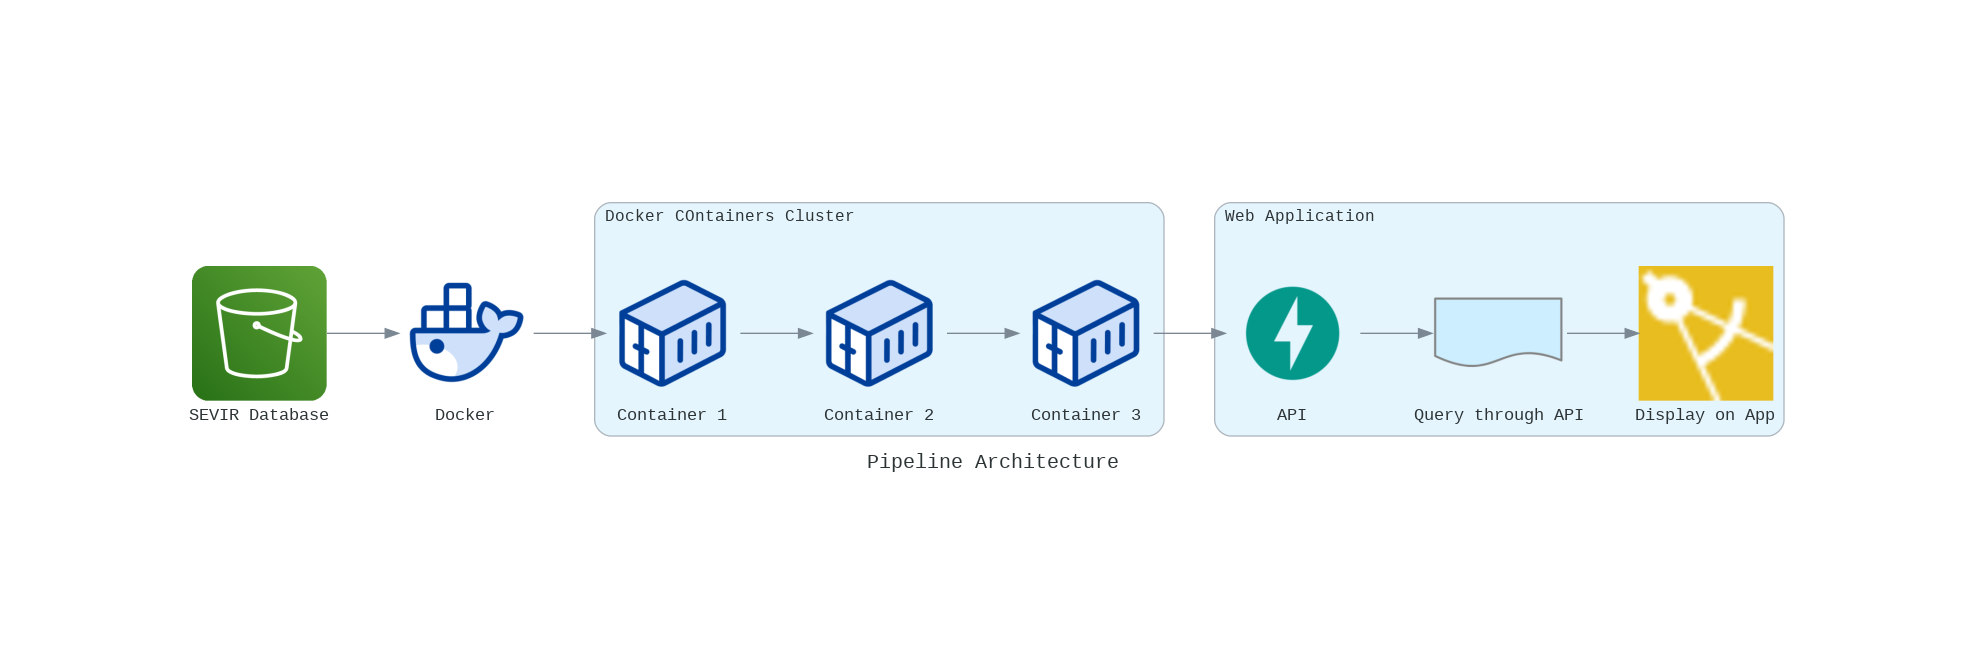

In [2]:
from diagrams import Diagram, Cluster
from diagrams.aws.storage import S3
from diagrams.onprem.analytics import Hadoop
from diagrams.programming.framework import Flask
from diagrams.programming.flowchart import Database
from diagrams.digitalocean.compute import Docker
from diagrams.digitalocean.compute import Containers
from diagrams.programming.language import Python
from diagrams.programming.flowchart import Document
from diagrams.generic.storage import Storage
from diagrams.digitalocean.storage import Folder
from diagrams.programming.framework import Fastapi, FastAPI
from diagrams.programming.flowchart import Display
from diagrams.ibm.applications import MobileApp

with Diagram("Pipeline Architecture") as diag:
    #dns = Route53("dns")
    #load_balancer = ELB("Load Balancer")
    doc = Docker("Docker")
    database = S3("SEVIR Database")
    #cache = Redis("Cache")
    with Cluster("Docker COntainers Cluster"):
        svc_group = [Containers("Container 1"),
                    Containers("Container 2"),
                    Containers("Container 3")]

    with Cluster("Web Application"):
        webs = [FastAPI("API"),
                Document("Query through API"),
                MobileApp("Display on App")]

database >> doc >> svc_group[0] >> svc_group[1] >> svc_group[2] >> webs[0] >> webs[1] >> webs[2]
diag # This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.

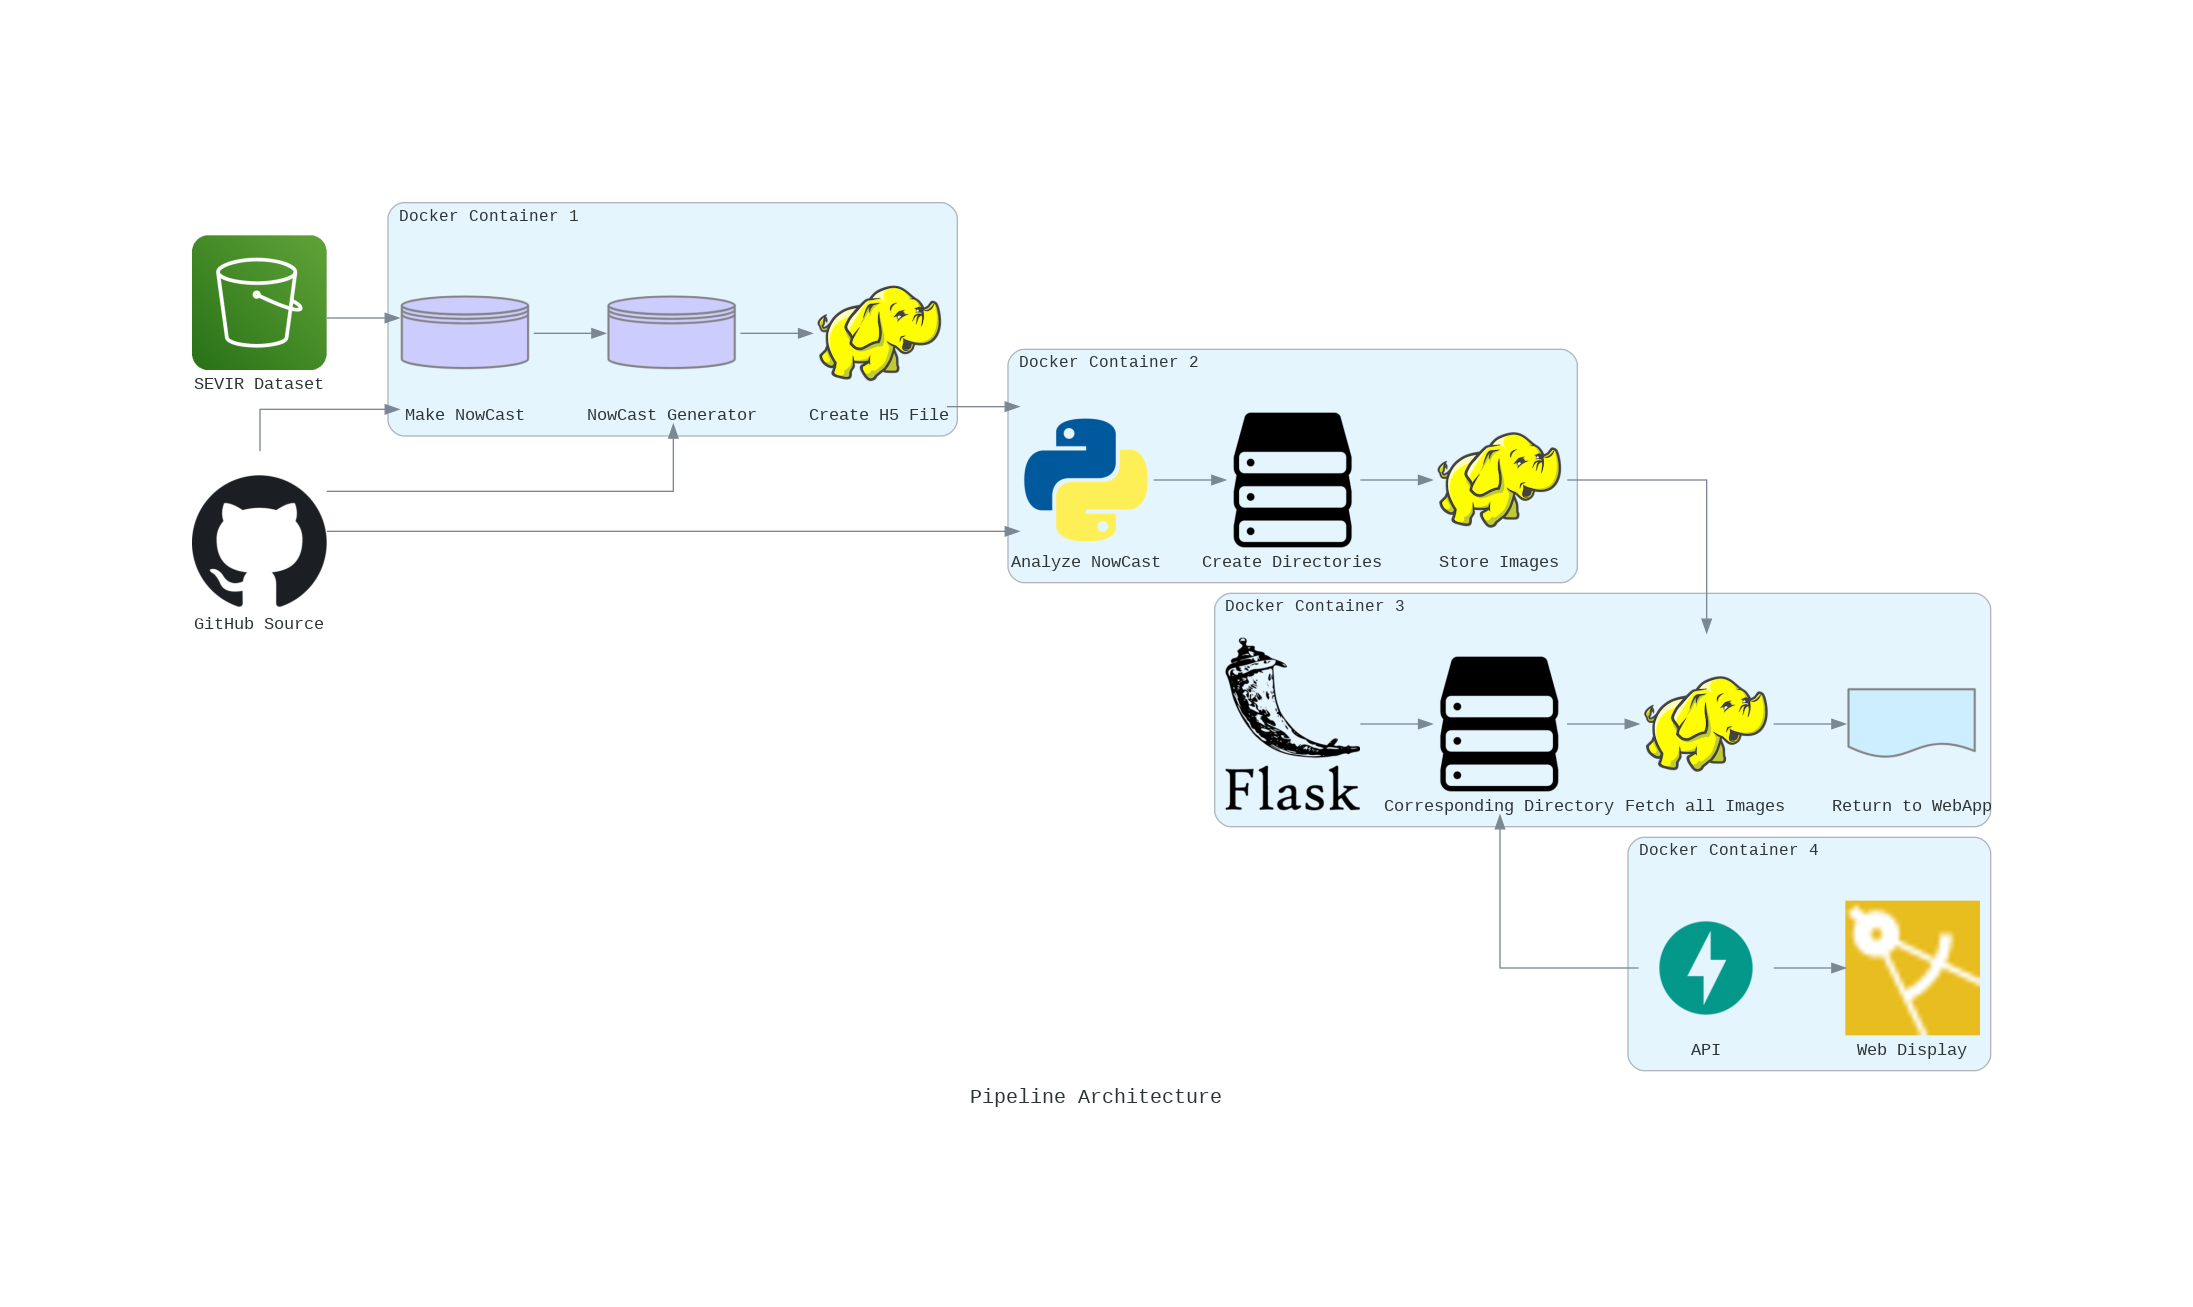

In [3]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.aws.storage import S3
from diagrams.gcp.storage import GCS
from diagrams.onprem.analytics import Hadoop
from diagrams.programming.framework import Flask
from diagrams.programming.flowchart import Database
from diagrams.digitalocean.compute import Docker
from diagrams.digitalocean.compute import Containers
from diagrams.programming.language import Python
from diagrams.programming.flowchart import Document
from diagrams.generic.storage import Storage
from diagrams.digitalocean.storage import Folder
from diagrams.onprem.vcs import Github
from diagrams.ibm.applications import MobileApp

with Diagram("Pipeline Architecture", show=False) as diag: # It's LR by default, but you have a few options with the orientation
    database = S3("SEVIR Dataset")
    github = Github("GitHub Source")
    with Cluster("Docker Container 1"):
      #d1 = Docker()
      svc_group = [Database("Make NowCast"),
                   Database("NowCast Generator"),
                   Hadoop("Create H5 File")]
    
    with Cluster("Docker Container 2"):
        container2 = [Python("Analyze NowCast"),
                      Storage("Create Directories"),
                      Hadoop("Store Images")]

    with Cluster("Docker Container 3"):
        container3 = [Flask(),
                      Storage("Corresponding Directory"),
                      Hadoop("Fetch all Images"),
                      Document("Return to WebApp")]

    with Cluster("Docker Container 4"):
        container4 = [Fastapi("API"),
                      MobileApp("Web Display")]


github >> svc_group[0]
github >> svc_group[1]
github >> container2[0]
container3[1] << container4[0]
x = database >> svc_group[0] >> svc_group[1] >> svc_group[2]
y = svc_group[2] >> container2[0] >> container2[1] >> container2[2]
container2[2] >> container3[2] >>container3[3]
container3[0] >> container3[1] >> container3[2]
container4[0] >> container4[1]

diag# This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.